In [1]:
from datetime import timedelta

from research_journal.october import ResNet_experiment
from ltbio.ml.datasets.augmentation import *

Load and preprocess biosignal:

In [2]:
ResNet_experiment.PATIENT_CODE = '6QXD'
ecg = ResNet_experiment.prepare_ecg(ResNet_experiment.PATIENT_CODE)

[1/] ECG of 6QXD loaded and preprocessed.


Overview seizures and their neighborhood:

In [3]:
seizures = ecg.events
print('Intervals between seizures')
for i in range(1, len(seizures)):
    print(f"From {i} to {i+1}: {seizures[i].offset - seizures[i-1].onset}")

Intervals between seizures
From 1 to 2: 2:55:39.851562
From 2 to 3: 1:47:14
From 3 to 4: 13:55:51.960938
From 4 to 5: 8:46:14.691406
From 5 to 6: 11:10:34.265625
From 6 to 7: 0:15:27
From 7 to 8: 1:13:02
From 8 to 9: 0:14:45
From 9 to 10: 0:23:29
From 10 to 11: 0:23:57


Criar dataset:

Prediction horizon: 0:45:00
>> Skipping negative chunk. <<
Dataset augmented from 40244 to 78772 examples.
Class weigths: (0.4410196516528716, 0.5589803483471284)


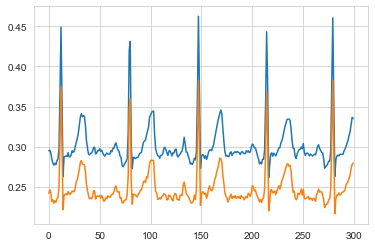

Train Seizures
Negative Examples: 34740 (44%)
Positive Examples: 44032 (55%)
Total: 78772


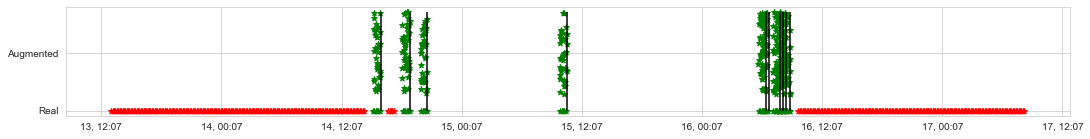

Seizure 5 -only
Negative Examples: 2666 (83%)
Positive Examples: 545 (16%)
Total: 3211


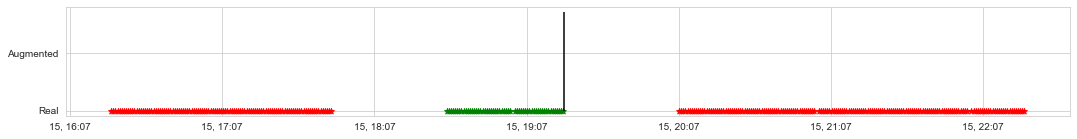

Resident Set Size: 2.020691 GBytes 
[2/] Train and test datasets arranged for unseen seizure 5.


In [4]:
UNSEEN_SEIZURE = 5
ResNet_experiment.PREICTAL_MARGINS = (timedelta(minutes=45), timedelta(minutes=45))
ResNet_experiment.PREICTAL_PADDINGS = (timedelta(minutes=-45), None)
ResNet_experiment.AUGMENTATION_TECHNIQUES = (Sine(0.005), Randomness(0.002), Scale(0.8))
train_dataset, test_dataset, unseen_ecg = ResNet_experiment.prepare_dataset(ecg, [1,2,3,4,6,7,8,9,10,11], UNSEEN_SEIZURE)

Create model:

In [5]:
ResNet_experiment.N_RESIDUAL_BLOCKS = 18
ResNet_experiment.INITIAL_FILTERS = 32
ResNet_experiment.INITIAL_KERNEL = 16
ResNet_experiment.STRIDE = 2
ResNet_experiment.GROUPS = 32
model = ResNet_experiment.create_model(f'{ResNet_experiment.PATIENT_CODE} Model without learning from Seizure 5')

Residual Blocks: 18
Initial Filters: 32
Initial Kernel: 16
Stride: 2
Groups: 32
[3/] 6QXD Model without learning from Seizure 5 created.


Train with N-1 seizures:

In [ ]:
ResNet_experiment.PATIENCE = 5
ResNet_experiment.BATCH_SIZE = 128
train_results = ResNet_experiment.train(model, train_dataset)

Epochs: 20
Initial LR: 0.001
|B| = 128
Epoch 1
-------------------------------
loss: 0.757011  [    0/63018]
loss: 0.612838  [ 1280/63018]
loss: 0.569847  [ 2560/63018]
loss: 0.604562  [ 3840/63018]
loss: 0.540872  [ 5120/63018]
loss: 0.528935  [ 6400/63018]
loss: 0.473664  [ 7680/63018]
loss: 0.503095  [ 8960/63018]
loss: 0.448630  [10240/63018]
loss: 0.419017  [11520/63018]
loss: 0.398328  [12800/63018]
loss: 0.391097  [14080/63018]
loss: 0.316842  [15360/63018]
loss: 0.413966  [16640/63018]
loss: 0.339476  [17920/63018]
loss: 0.275151  [19200/63018]
loss: 0.394095  [20480/63018]
loss: 0.417908  [21760/63018]
loss: 0.360167  [23040/63018]
loss: 0.414171  [24320/63018]
loss: 0.333593  [25600/63018]
loss: 0.248286  [26880/63018]
loss: 0.352169  [28160/63018]
loss: 0.344651  [29440/63018]
loss: 0.289195  [30720/63018]
loss: 0.356048  [32000/63018]
loss: 0.266075  [33280/63018]
loss: 0.300070  [34560/63018]
loss: 0.290694  [35840/63018]
loss: 0.376574  [37120/63018]
loss: 0.223283  [3840

Test with 1 Seizure:

In [ ]:
test_results = ResNet_experiment.test(model, test_dataset)

In [ ]:
ResNet_experiment.test_decision(test_results, UNSEEN_SEIZURE, unseen_ecg, (2, 5, 10, 15, 20, 25, int(ResNet_experiment.RESAMPLING_FREQ)))

## Conclusões

A crise acontece no dia 15 às 19h14 (da tarde).
